# Keep Me Comfy

Using your destination (city name and state), the APIs will find out what the weather is like next week and suggest clothing to pack as well as price of the top result from Walmart.

Notes for improvement:
 - Function-fy everything to make it easier to use -- right now it's practical only in Jupyter notebook format.
 - Add forecast with choice of day option (i.e., for travel within 15-days).
 - Add Google Map functionality to display closest Walmart to search location.
 - Spelling errors abound.
 - Product Recommendations were hard-coded, they could be more dynamic.

Pitfalls:
 - Results from weather and Walmart only display the first found result.
    - when multiple city names exist (i.e., Springfield or Vancouver), the first results may not be what the user searched for.
    - product recommendations are not always useful, sometimes a Men's item appears and sometimes a Woman's item appears regardless of the search phrase.
 - Change in API format or terminology will lead to future problems in functionality.

In [1]:
import requests
import json
from PIL import Image
from time import sleep

In [56]:
city = 'Seattle'

## WEATHER

### AccuWeather
From AccuWeather, API key: u4ZjYZklPt0BO26OWPD71fA3r5n9Qtg1
Save City, State, Country, Longitude, Latitude, and City Key
http://dataservice.accuweather.com/locations/v1/cities/search?apikey=u4ZjYZklPt0BO26OWPD71fA3r5n9Qtg1&q=Chicago


### DarkSky
From Darksky.net, API key: 85ef1b93e0c755a5367de14b601afb78
https://api.darksky.net/forecast/[key]/[latitude],[longitude]
Save Icon (for recommendation), Summary, and Temperature

In [57]:
#to get location coordinates and location ID
accuweather_api = 'u4ZjYZklPt0BO26OWPD71fA3r5n9Qtg1'
weather_url1 = 'http://dataservice.accuweather.com/locations/v1/cities/search?apikey='
weather_r1 = requests.get(weather_url1 + accuweather_api + '&q=' + city)
weather_data1 = weather_r1.json()

#metadata
weather_key = weather_data1[0]['Key']
long = weather_data1[0]['GeoPosition']['Longitude']
lat = weather_data1[0]['GeoPosition']['Latitude']
weather_city = weather_data1[0]['EnglishName']
weather_state = weather_data1[0]['AdministrativeArea']['EnglishName']
weather_country = weather_data1[0]['Country']['EnglishName']

In [58]:

#SAMPLE TEST

print(str(weather_key) + '\n' + str(long) + '\n' + str(lat) + '\n' + str(weather_city) + '\n' + str(weather_state) + '\n' + str(weather_country))

351409
-122.332
47.606
Seattle
Washington
United States


In [59]:
darksky_api_key = '85ef1b93e0c755a5367de14b601afb78'
weather_url2 = 'https://api.darksky.net/forecast/'
weather_r2 = requests.get(weather_url2 + darksky_api_key + '/' + str(lat) + ',' + str(long))
weather_data2 = weather_r2.json()

#metadata
weather_icon = weather_data2['currently']['icon']
weather_summary = weather_data2['currently']['summary']
weather_temperature = weather_data2['currently']['temperature']

In [60]:

#SAMPLE TEST

print(str(weather_icon) + '\n' + str(weather_summary) + '\n' + str(weather_temperature))

rain
Light Rain
48.55


## Product Search
Walmart OpenAI, API key: vbwvkvjm6gnyuzc2rceckxgk
Product Search (ex): http://api.walmartlabs.com/v1/search?query=ipod&format=json&apiKey=vbwvkvjm6gnyuzc2rceckxgk
Lookup (ex): http://api.walmartlabs.com/v1/items/541357139?format=json&apiKey=vbwvkvjm6gnyuzc2rceckxgk


In [95]:
#define products for each weather type icon
if str(weather_icon) == 'clear-day':
    prod_top='workout t-shirt beast mode'
    prod_bottom='billabong parallel mens shorts'
    prod_shoes='crocs classic gold'
    prod_accessory='sunscreen'
elif str(weather_icon) == 'clear-night':
    prod_top='george mens short sleeve polo'
    prod_bottom='mens levi 501'
    prod_shoes='Dr Scholls Mens brisk shoe'
    prod_accessory='men timex easy reader watch'
elif str(weather_icon) == 'rain':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='wrangler mens legacy cargo pants'
    prod_shoes='unisex rubber rain boots'
    prod_accessory='muk luks mens scarf'
elif str(weather_icon) == 'snow':
    prod_top='climate x mens ysc5 snow boot'
    prod_bottom='wrangler mens legacy cargo pants'
    prod_shoes='mens essential winter boot'
    prod_accessory='muk luks mens scarf'
elif str(weather_icon) == 'sleet':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='wrangler mens legacy cargo pants'
    prod_shoes='climate x mens ysc5 snow boot'
    prod_accessory='muk luks mens scarf'
elif str(weather_icon) == 'wind':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='mens levi 501'
    prod_shoes='Athletic Works Mens Running Shoe'
    prod_accessory='men timex easy reader watch'
elif str(weather_icon) == 'fog':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='mens levi 501'
    prod_shoes='Athletic Works Mens Running Shoe'
    prod_accessory='muk luks mens scarf'
elif str(weather_icon) == 'cloudy':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='mens levi 501'
    prod_shoes='Athletic Works Mens Running Shoe'
    prod_accessory='men timex easy reader watch'
elif str(weather_icon) == 'partly-cloudy-day':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='mens levi 501'
    prod_shoes='Athletic Works Mens Running Shoe'
    prod_accessory='men timex easy reader watch'
elif str(weather_icon) == 'partly-cloudy-night':
    prod_top='pulse mens waterproof jacket'
    prod_bottom='mens levi 501'
    prod_shoes='Dr Scholls Mens brisk shoe'
    prod_accessory='men timex easy reader watch'
else:
    prod_top='workout t-shirt beast mode'
    prod_bottom='mens levi 501'
    prod_shoes='Dr Scholls Mens brisk shoe'
    prod_accessory='men timex easy reader watch'

In [96]:
walmart_api_key = 'vbwvkvjm6gnyuzc2rceckxgk'

#item search and id finder
walmart_url1 = 'http://api.walmartlabs.com/v1/search?query='

for x in range(1,5):
    #tops
    itemtop_r1 = requests.get(walmart_url1 + str(prod_top) + '&format=json&apiKey=' + walmart_api_key)
    itemtop_data1=itemtop_r1.json()
    itemtop_id = itemtop_data1['items'][0]['itemId']
    #bottoms
    itembottom_r1 = requests.get(walmart_url1 + str(prod_bottom) + '&format=json&apiKey=' + walmart_api_key)
    itembottom_data1=itembottom_r1.json()
    itembottom_id = itembottom_data1['items'][0]['itemId']
    #shoes
    itemshoes_r1 = requests.get(walmart_url1 + str(prod_shoes) + '&format=json&apiKey=' + walmart_api_key)
    itemshoes_data1=itemshoes_r1.json()
    itemshoes_id = itemshoes_data1['items'][0]['itemId']
    #accessory
    itemaccessory_r1 = requests.get(walmart_url1 + str(prod_accessory) + '&format=json&apiKey=' + walmart_api_key)
    itemaccessory_data1=itemaccessory_r1.json()
    itemacessory_id = itemaccessory_data1['items'][0]['itemId']

In [97]:

#SAMPLE TEST

print(str(itemtop_id), str(itembottom_id), str(itemshoes_id), str(itemacessory_id))

120022513 26848779 22026486 56218763


In [98]:
walmart_url2 = 'http://api.walmartlabs.com/v1/items/'

sleep(10)

#gathers medium image, price, name, and url
for x in range(1,5):
    #tops
    itemtop_r2 = requests.get(walmart_url2 + str(itemtop_id) + '?format=json&apiKey=' + walmart_api_key)
    itemtop_data2=itemtop_r2.json()
    topimg = itemtop_data2['mediumImage']
    topprice = itemtop_data2['salePrice']
    topname = itemtop_data2['name']
    topurl = itemtop_data2['productUrl']
    sleep(1)
    #bottoms
    itembottom_r2 = requests.get(walmart_url2 + str(itembottom_id) + '?format=json&apiKey=' + walmart_api_key)
    itembottom_data2=itembottom_r2.json()
    bottomimg = itembottom_data2['mediumImage']
    bottomprice = itembottom_data2['salePrice']
    bottomname = itembottom_data2['name']
    bottomurl = itembottom_data2['productUrl']
    sleep(1)
    #shoes
    itemshoes_r2 = requests.get(walmart_url2 + str(itemshoes_id) + '?format=json&apiKey=' + walmart_api_key)
    itemshoes_data2=itemshoes_r2.json()
    shoeimg = itemshoes_data2['mediumImage']
    shoeprice = itemshoes_data2['salePrice']
    shoename = itemshoes_data2['name']
    shoeurl = itemshoes_data2['productUrl']
    sleep(1)
    #accessory
    itemaccessory_r2 = requests.get(walmart_url2 + str(itemacessory_id) + '?format=json&apiKey=' + walmart_api_key)
    itemaccessory_data2=itemaccessory_r2.json()
    accessoryimg = itemaccessory_data2['mediumImage']
    accessoryprice = itemaccessory_data2['salePrice']
    accessoryname = itemaccessory_data2['name']
    accessoryurl = itemaccessory_data2['productUrl']

In [99]:

# SAMPLE TEST

print(str(accessoryurl), str(shoename), str(bottomprice), str(topimg))

http://c.affil.walmart.com/t/api01?l=https%3A%2F%2Fwww.walmart.com%2Fip%2FMUK-LUKS-Men-s-Basic-Scarf%2F56218763%3Faffp1%3D8sC7FtHpVd706PdNgxOzfKQN3FI892EU8acskxVggt4%26affilsrc%3Dapi%26veh%3Daff%26wmlspartner%3Dreadonlyapi Unisex Rubber Rain Boots 19.97 https://i5.walmartimages.com/asr/d733bbf1-a432-4a16-beda-1a8621843d2d_1.4ed81de2e8478225d8eec9911064a712.jpeg?odnHeight=180&odnWidth=180&odnBg=FFFFFF


# Recommendation

In [100]:
#tops
r = requests.get(topimg, stream=True)
r.raw.decode_content = True
im_top = Image.open(r.raw)

#bottom
r = requests.get(bottomimg, stream=True)
r.raw.decode_content = True
im_bottom = Image.open(r.raw)

#shoe
r = requests.get(shoeimg, stream=True)
r.raw.decode_content = True
im_shoe = Image.open(r.raw)

#accessory
r = requests.get(accessoryimg, stream=True)
r.raw.decode_content = True
im_accessory = Image.open(r.raw)

In [101]:
print('For your day in ' + weather_city + ', ' + weather_state + ' the weather should be ' + str(weather_temperature) + ' degrees Fahrenheit and ' + str(weather_summary)
    + '.' + '\nMake sure to stay comfortable! We recommend: \n'
    + ' a top similar to the ' + str(topname)
    + ', which costs $' + str(topprice) + ';\n'
    + ' a bottom similar to the ' + str(bottomname)
    + ', which costs $' + str(bottomprice) + ';\n'
    + ' shoes similar to the ' + str(shoename)
    + ', which costs $' + str(shoeprice) + ';\n'
    + ' and to top it all off, ' + str(accessoryname)
    + ', which costs $' + str(accessoryprice) + ' at Walmart.')

For your day in Seattle, Washington the weather should be 48.55 degrees Fahrenheit and Light Rain.
Make sure to stay comfortable! We recommend: 
 a top similar to the Pulse Mens Big Sizes Soft Shell Waterproof Jacket 2X - 6X, which costs $74.99;
 a bottom similar to the Wrangler Jeans Co. Men's Twill Cargo Pant, which costs $19.97;
 shoes similar to the Unisex Rubber Rain Boots, which costs $14.0;
 and to top it all off, MUK LUKS Men's Basic Scarf, which costs $23.16 at Walmart.


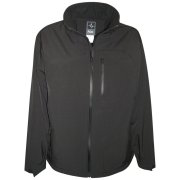

In [102]:
im_top

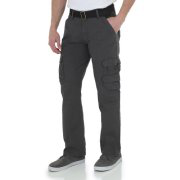

In [103]:
im_bottom

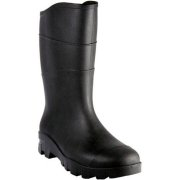

In [104]:
im_shoe

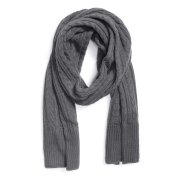

In [105]:
im_accessory